# Bike Sharing Dataset Assignment

## Reading and Understanding the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score


In [2]:
day = pd.read_csv('C:/Users/Parth/Downloads/day.csv')

In [3]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
day.shape
# There are total 730 rows and 16 columns

(730, 16)

In [5]:
day.describe()
# The statistical part containing mean, median, and mode of the data

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
day.info()
# Here we can see the types of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Here we need to get categorical variables into its orignal form 

In [8]:
def app_season(x):
    return x.map({
        1: 'Spring',
        2: 'Summer',
        3: 'Fall',
        4: 'Winter'
    })

day[['season']] = day[['season']].apply(app_season)

In [9]:
day.season.value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [10]:
def app_mnth(x):
    return x.map({
        1: 'Jan',
        2: 'Feb',
        3: 'Mar',
        4: 'Apr',
        5: 'May',
        6: 'Jun',
        7: 'Jul',
        8: 'Aug',
        9: 'Sep',
        10: 'Oct',
        11: 'Nov',
        12: 'Dec'
        
    })

day[['mnth']] = day[['mnth']].apply(app_mnth)

In [11]:
def app_weekday(x):
    return x.map({
        0: 'Sun',
        1: 'Mon',
        2: 'Tue',
        3: 'Wed',
        4: 'Thur',
        5: 'Fri',
        6: 'Sat'
    })

day[['weekday']] = day[['weekday']].apply(app_weekday)

In [12]:
def app_weathersit(x):
    return x.map({
        1: 'Clear',
        2: 'Misty-Cloud',
        3: 'Light-Rain',
        4: 'Heavy-Rain'
    })

day[['weathersit']] = day[['weathersit']].apply(app_weathersit)

In [13]:
day.head()
# Here as we can see season, month, weekday, weathersit column got its numerical column got converted into
#categorical column

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,Jan,0,Mon,1,Misty-Cloud,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,Jan,0,Tue,1,Misty-Cloud,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,Jan,0,Thur,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [14]:
day.drop(['instant','dteday','casual','registered','atemp'],inplace=True,axis=1)

# Here I dropped 'instant' as it wasnt useful for any prediction
# Dropped 'dteday' as prediction for upcoming season and year was needed so data for a individual date was not needed as it gets covered under the year
# Dropped 'Casual' and 'Registered' because there is no need of predicition for a casual or registered type of data and both gets covered under the 'cnt' column
# Also dropped 'atemp' column as didnt found much difference between temp and atemp so dropped one of them

In [15]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,1,Misty-Cloud,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,1,Misty-Cloud,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thur,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


# Visualization using categorical variables

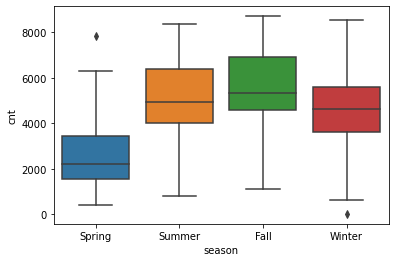

In [16]:
sns.boxplot(x = 'season', y= 'cnt' , data=day)

In [17]:
# here we can see highest sales in Fall following to which in summer, winter and lowest in spring season

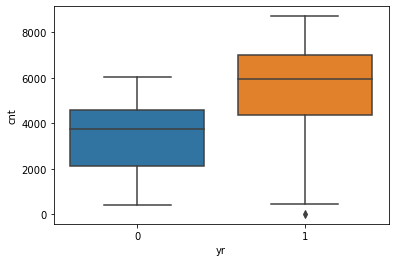

In [18]:
sns.boxplot(x = 'yr', y= 'cnt' , data=day)

In [19]:
# There was more sales revenue in year 2019 as the business well set and in 2018 it was shining slowly

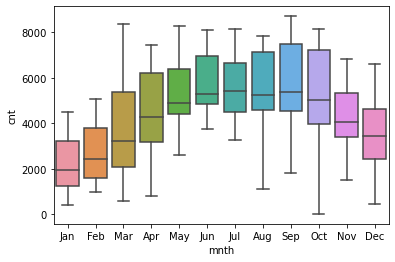

In [20]:
sns.boxplot(x = 'mnth', y= 'cnt' , data=day)

In [21]:
# In the month of may, jun, jul, aug, and september the subscription is more comparing to other months

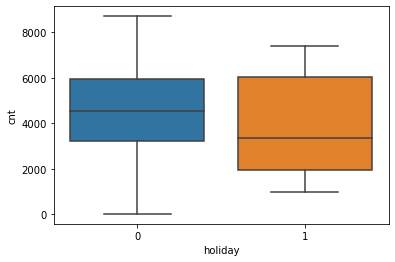

In [22]:
sns.boxplot(x = 'holiday', y= 'cnt' , data=day)

In [23]:
# Here on holiday subscriptions seems much low comparing to working day, so holidays are not good for business sales

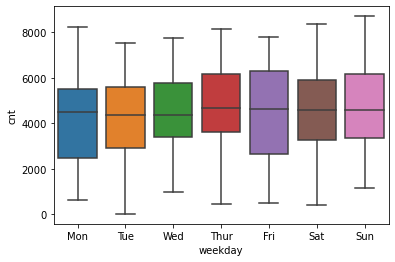

In [24]:
sns.boxplot(x = 'weekday', y= 'cnt' , data=day)

In [25]:
# The median for remains around 4200 units everyday
# Whereas the subscription seems to be less on Monday, Tuesday and Wednesday in comparison to other days
# So company can think of keeping offers more on Thursday, Friday, Saturday and Sunday

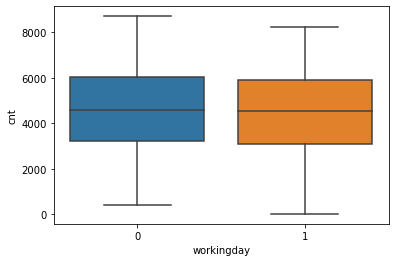

In [26]:
sns.boxplot(x = 'workingday', y= 'cnt' , data=day)

In [27]:
# Whether its a working day or non-working day the subscription of bike remains same and the median remains at 4200 units

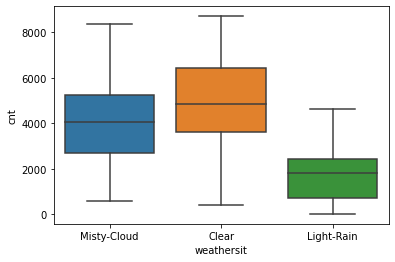

In [28]:
sns.boxplot(x = 'weathersit', y= 'cnt' , data=day)

In [29]:
# There is a subscription of more than 2500 units in Misty-cloud and Clear weather whereas too much less in Ligt-rain weather

In [30]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,1,Misty-Cloud,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,1,Misty-Cloud,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thur,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


# Adding the dummy variables

In [31]:
def dummies(x,df):
    temp = pd.get_dummies(df[x],drop_first=True)
    df=pd.concat([df,temp],axis=1)
    df.drop([x],axis=1,inplace=True)
    return df

day = dummies('season',day)
day = dummies('mnth',day)
day = dummies('weekday',day)
day = dummies('weathersit',day)

day.head()
# here we need to add the dummy variables so that categorical variables gets converted into numerical

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Light-Rain,Misty-Cloud
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Visualizing the numeric variable

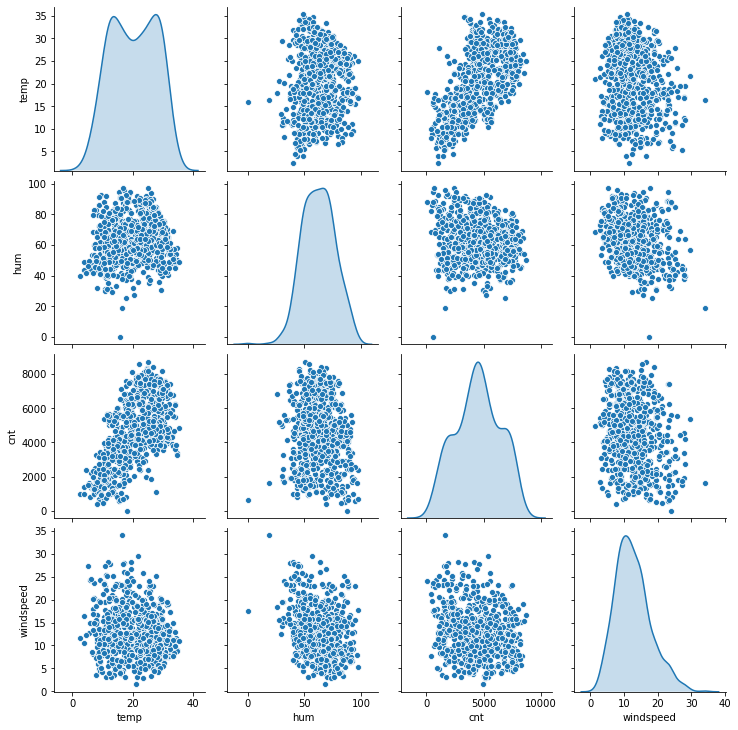

In [32]:
sns.pairplot(day[{'temp','hum','windspeed','cnt'}],diag_kind='kde')
plt.show()

In [33]:
# The model shows here that there is Linear relation between Temp and Cnt

# Splitting the data into Train-Test Split


In [34]:
df_train,df_test = train_test_split(day, train_size = 0.70, random_state= 100)

# Rescaling the features

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
 scaler = MinMaxScaler()

In [37]:
var = ['temp','hum','windspeed','cnt']

In [38]:
df_train[var] = scaler.fit_transform(df_train[var])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Light-Rain,Misty-Cloud
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [39]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Light-Rain,Misty-Cloud
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


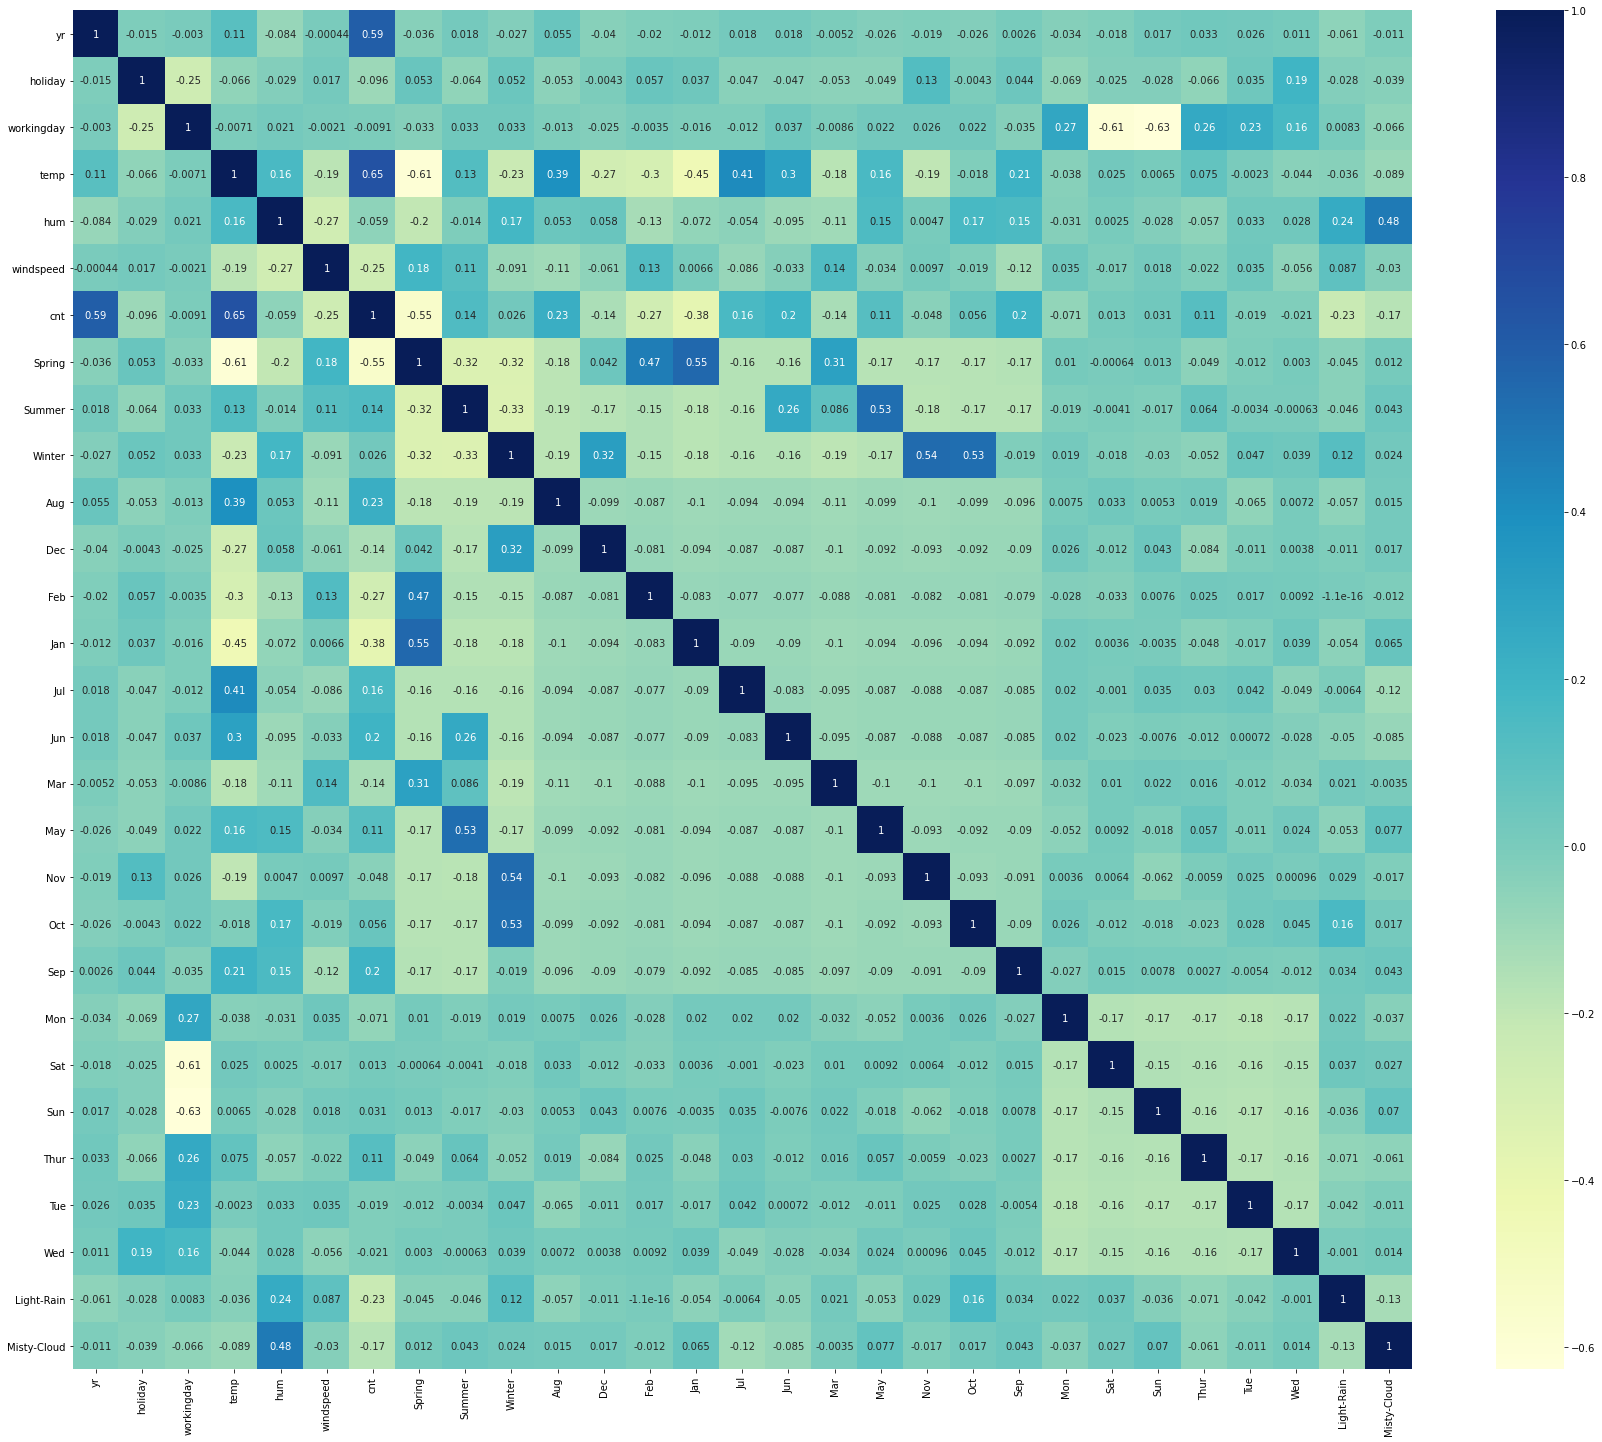

In [40]:
plt.figure(figsize=(30,25))
sns.heatmap(df_train.corr(),annot=True,cmap = 'YlGnBu')
plt.show()

# Division of the dataset into X and Y sets for the model building

In [41]:
y_train = df_train.pop('cnt')
X_train = df_train

# Recusrsive Feature Elimination

In [42]:
lm=LinearRegression()
lm.fit(X_train,y_train)
rfe=RFE(lm,15)
rfe=rfe.fit(X_train,y_train)


In [43]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 11),
 ('Mar', False, 14),
 ('May', False, 8),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 7),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thur', False, 13),
 ('Tue', False, 6),
 ('Wed', False, 10),
 ('Light-Rain', True, 1),
 ('Misty-Cloud', True, 1)]

In [44]:
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Spring', 'Summer',
       'Winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'Light-Rain',
       'Misty-Cloud'],
      dtype='object')

In [45]:
X_train.columns[~rfe.support_]

Index(['workingday', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct', 'Mon', 'Sat',
       'Sun', 'Thur', 'Tue', 'Wed'],
      dtype='object')

# Building model using statsmodel, for the detailed statistics

In [46]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [47]:
X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,Spring,Summer,Winter,Dec,Jan,Jul,Nov,Sep,Light-Rain,Misty-Cloud
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1
111,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,1


In [48]:
def build_model(X,y):
    X = sm.add_constant(X)
    lm = sm.OLS(y,X).fit()
    print(lm.summary())
    return X

In [49]:
def VIF(X):
    vif = pd.DataFrame()
    vif['Features']= X.columns
    vif['VIF']=[variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif=vif.sort_values(by = "VIF",ascending = False)
    return(vif)
    

# Model 1

In [50]:
X_train_new = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          8.15e-189
Time:                        20:40:52   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3197      0.036      8.859      

### "Dec" p-value seems to be higher comparatively

In [51]:
VIF(X_train_new)

,Features,VIF
0,const,82.52
6,Spring,5.27
3,temp,4.42
8,Winter,3.83
7,Summer,2.77
4,hum,1.92
12,Nov,1.77
10,Jan,1.68
15,Misty-Cloud,1.57
9,Dec,1.50


In [52]:
X_train_new = X_train_new.drop(["Dec"],axis=1)

# Model 2

In [53]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          4.41e-189
Time:                        20:40:53   Log-Likelihood:                 512.08
No. Observations:                 510   AIC:                            -994.2
Df Residuals:                     495   BIC:                            -930.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3032      0.035      8.598      

In [54]:
VIF(X_train_new)

,Features,VIF
0,const,78.35
6,Spring,5.20
3,temp,3.97
8,Winter,3.76
7,Summer,2.68
4,hum,1.90
9,Jan,1.57
14,Misty-Cloud,1.56
10,Jul,1.49
11,Nov,1.49


### "Nov" p-value is too much high which seems to be insignificant

In [55]:
X_train_new = X_train_new.drop(["Nov"],axis=1)

# Model 3

In [56]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          7.59e-190
Time:                        20:40:53   Log-Likelihood:                 511.13
No. Observations:                 510   AIC:                            -994.3
Df Residuals:                     496   BIC:                            -935.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2964      0.035      8.483      

In [57]:
VIF(X_train_new)

,Features,VIF
0,const,76.76
6,Spring,5.08
3,temp,3.89
8,Winter,3.59
7,Summer,2.65
4,hum,1.90
9,Jan,1.57
13,Misty-Cloud,1.56
10,Jul,1.49
11,Sep,1.30


### "Jan" p-value seems to be higher exceeding 0.005 at 0.059

In [58]:
X_train_new = X_train_new.drop(["Jan"],axis=1)

# Model 4

In [59]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          2.95e-190
Time:                        20:40:53   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2848      0.034      8.258      

In [60]:
VIF(X_train_new)

,Features,VIF
0,const,74.37
6,Spring,5.02
3,temp,3.61
8,Winter,3.48
7,Summer,2.62
4,hum,1.89
12,Misty-Cloud,1.56
9,Jul,1.48
10,Sep,1.30
11,Light-Rain,1.24


### As vif of "Spring" is higher it needs to be dropped

In [61]:
X_train_new = X_train_new.drop(["Spring"],axis=1)

# Model 5

In [62]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.0
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          6.89e-190
Time:                        20:40:53   Log-Likelihood:                 505.58
No. Observations:                 510   AIC:                            -987.2
Df Residuals:                     498   BIC:                            -936.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2262      0.027      8.384      

In [63]:
VIF(X_train_new)

,Features,VIF
0,const,44.97
4,hum,1.87
3,temp,1.60
11,Misty-Cloud,1.55
8,Jul,1.43
6,Summer,1.33
7,Winter,1.29
10,Light-Rain,1.24
9,Sep,1.19
5,windspeed,1.18


### p-value seems to be higher of "Jul" so it needs to get dropped

In [64]:
X_train_new = X_train_new.drop(["Jul"],axis=1)

# Model 6

In [65]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     256.9
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.32e-189
Time:                        20:40:54   Log-Likelihood:                 502.03
No. Observations:                 510   AIC:                            -982.1
Df Residuals:                     499   BIC:                            -935.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2261      0.027      8.331      

In [66]:
VIF(X_train_new)

,Features,VIF
0,const,44.97
4,hum,1.86
10,Misty-Cloud,1.55
3,temp,1.27
7,Winter,1.25
9,Light-Rain,1.23
6,Summer,1.19
5,windspeed,1.18
8,Sep,1.11
1,yr,1.03


#### Now all the p-values are less than 0 and VIF values of all the variables are less than 0

### Inferences

#### - With 10 variables model seems perfect
#### -Ad. R-Square = 0.834
#### -R-Square = 0.837
#### -P-value = 0 for all the variables
#### -VIF of all the variables is less than 2


# Residual Analysis of Model

In [67]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_pred = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

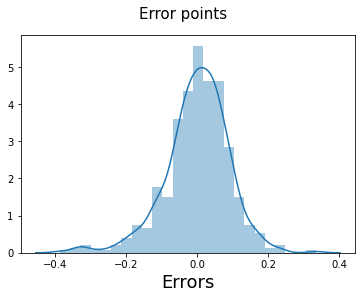

In [68]:
# Plotting the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 25)
fig.suptitle('Error points', fontsize = 15)
plt.xlabel('Errors', fontsize = 18)


##### Here error points are approximately normally distributed between -0.2 and 0.2, so model seems to be satisfied

## Evaluation and Prediction

In [69]:
var = ['temp','cnt','hum','windspeed']
df_test[var] =scaler.fit_transform(df_test[var])

In [70]:
# Dividing into X and Y testset
y_test = df_test.pop('cnt')
X_test = df_test

In [71]:
X_train_1 = X_train_new.drop('const', axis =1)

#New dataframe X_test_1
X_test_1 = X_test[X_train_1.columns]

# adding constant
X_test_1 = sm.add_constant(X_test_1)

In [72]:
y_pred = lm.predict(X_test_1)

### Evaluation using y_train and y_pred

In [73]:

r2=r2_score(y_test, y_pred)
print(r2)

0.8040192993235495


### Adjusted R^2

In [74]:
n = X_test_1.shape[0]


p = X_test_1.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)

adjusted_r2

0.793654935345468

### Plotting y_test vs y_pred 

Text(0, 0.5, 'y_pred')

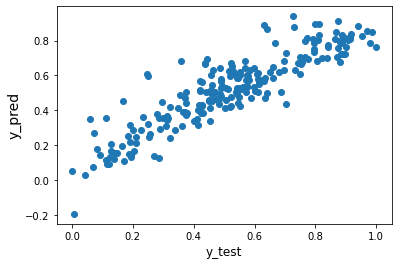

In [75]:
plt.scatter(y_test,y_pred)
plt.xlabel('y_test', fontsize=12)
plt.ylabel('y_pred',fontsize = 14)

In [76]:
# Here the test and pred data seems to be linear as they are in the same direction

### Final Evaluation

#### Train r^2 = 0.837
#### Train Adjusted r^2 = 0.834
#### Test r^2 = 0.804
#### Test Adjuested r^2 = 0.791

### So here the train and test sets are on good sync and the model seems to be perfect

# Final Inferences and suggestion to the company

#### Considering the weather, users are more comfortable to rent the bike when the climate is clear or cloudy. Rainy weather is not suitable for them
#### Medium temperature is suitable for the customers to use our services
#### Company will witness its position same as 2019 when the situation gets normal

# Thank you